In [188]:
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
conn = psycopg2.connect(database="piscineds",
                        user='mpellegr', password='mysecretpassword', 
                        host='localhost', port='5432'
)
cursor = conn.cursor()

In [189]:
cursor.execute("""SELECT date_trunc('day', event_time)::date AS date,
                    COUNT(DISTINCT user_id)
                    FROM customers
                    WHERE event_type='purchase'
                    GROUP BY date""")
res = cursor.fetchall()
days = [date[0] for date in res]
n_of_users = [count[1] for count in res]

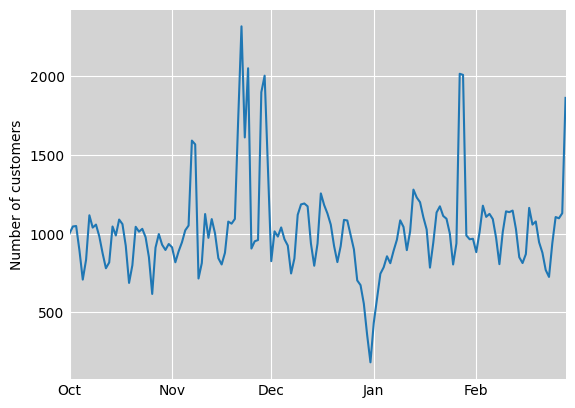

In [190]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.plot(days, n_of_users)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Number of customers')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.grid(True, color='white')
ax.margins(x=0)
plt.show()

In [191]:
cursor.execute("""SELECT date_trunc('month', event_time)::date AS month,
                    SUM(price) AS total_sales
                    FROM customers
                    WHERE event_type='purchase'
                    GROUP BY month
                    ORDER BY month;""")
res = cursor.fetchall()
months = [months[0] for months in res]
amount = [amount[1] for amount in res]

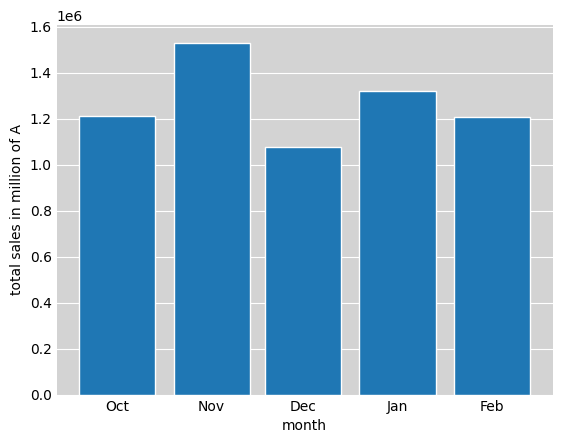

In [192]:
fig, ax = plt.subplots()
ax.set_axisbelow(True)
ax.set_facecolor('lightgrey')
ax.bar(months, amount, width=25, edgecolor="white")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('total sales in million of A')
ax.set_xlabel('month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.grid(True, axis='y', color='white')
plt.show()

In [206]:
cursor.execute("""
                    SELECT date_trunc('day', event_time)::date AS day,
                    SUM(price) AS total_sales
                    FROM customers
                    WHERE event_type='purchase'
                    GROUP BY day;
                """)
res = cursor.fetchall()
daily_amount = [line[1] for line in res]
ratio = [daily_amount[i] / n_of_users[i] for i in range(0, len(daily_amount))]

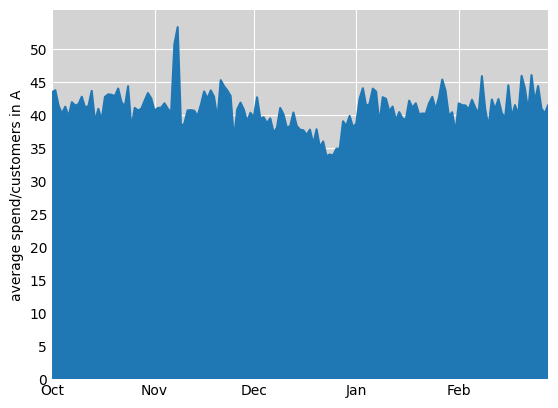

In [219]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_axisbelow(True)
ax.plot(days, ratio)
ax.fill_between(days, ratio, 0)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_yticks(range(0, 55, 5))
ax.set_ylabel('average spend/customers in A')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.grid(True, color='white')
ax.set_ylim(bottom=0)
ax.margins(x=0)
plt.show()